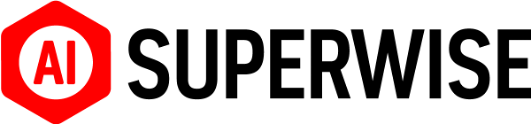

# **Example:  Applying a Superwise Natural Language Conversion, Guardrails, and Monitoring to a live Robot**

This example shows how a Live Robot interaction can be commanded, protected and monitored using Superwise.  In this particular case we are using some basic ROS (https://www.ros.org/) commands to drive a TurtleBot3.  Superwise is taking in natural language and converting the text to commands that can be used to control the Robot.  Superwise is also applying Guardrails to prevent natural language input that is not wanted or pertinent to the scenario.  Superwise is also Monitoring the interactions input to the Robot.  This is a very basic implementation just to illustrate the power of Superwise AI being applied to Physical Systems.  Let's get started.

# **Create the Environment to Access the Live Robot**

**Create an account at: https://www.theconstruct.ai/ Then access the Python Basics Rosject**

![alt text](Construct_Rosject_to_Access.png "Access to Project")

# **Create the Superwise Agent that interacts with the Robot**

Note that this is a small subset of all you can do with Superwise.  
For complete Superwise capabilities visit: https://docs-swe.superwise.ai/
Follow the instructions to create an applications here:  https://docs-swe.superwise.ai/docs/build-application.
For your prompt in your Superwise application use:  "Return the velocity that is input.  Only return the decimal value of the velocity in meters per second."
Make sure and note the applications app_id and app_token

![alt text](Superwise_Docs.png "Access to Project")

Implement two guardrails to be leveraged in the application per the instructions here:  https://docs-swe.superwise.ai/docs/guardrails
For the first guardrail create an Allowed Topics Guardrail called "Velocity" with an Allowed Topic of "A Velocity must be included in the input".  For the second guardrail create an Allowed Topics Guardrail called "Right Turns" with an Allowed topic of "Only allow topics on 'turning right'".

# **Write the Script that Accesses the Superwise Agent and Interacts with ROS and the live Robot**

Back in the Rosject from the above, on the command line type: "cd ros2_ws/src/python_basics_project/python_basics_project"  and create (touch) a new python file with a name you choose

In [23]:
#In the Rosject IDE navigate to an open that file and paste in the following code:

#!/usr/bin/python3

# python imports
import time
import threading
import traceback
# ros2 imports
import rclpy
from rclpy.executors import MultiThreadedExecutor
# module imports
from robot_interface import RobotInterface
# superwise imports
import requests


#~#~#~#~#~# start your function definitions after this line #~#~#~#~#~#

def sample_move(linear, angular):
    # sample function to move the robot
    # this function can be deleted later!
    global robot_interface
    robot_interface.linear_velocity = linear
    robot_interface.angular_velocity = angular
    return None

#~#~#~#~#~# finish your function definitions before this line #~#~#~#~#~#

def spin_node():
    """
    make the robot interface program to run in a separate thread
    NOTE: THE ROBOT WILL NOT WORK IF THIS FUNCTION IS REMOVED !!!
    """
    global executor
    executor.spin()
    return None

app_id = "<your Superwise Application App ID>"
app_token = "<your Superwise Application App Token"

#test the agent with the updated guardrail
def ask_application_via_api(app_id, user_input):
  endpoint_url = f"https://api.superwise.ai/v1/app-worker/{app_id}/v1/ask"

  payload = {
    "chat_history": [],
    "input": user_input
    #"prompt": employee_assign_prompt
  }

  headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "x-api-token": app_token
    }

  resp = requests.post(endpoint_url, json=payload, headers=headers)
  app_response = resp.json()
  return app_response


if __name__ == "__main__":

    # initialize ros2 with python
    rclpy.init(args=None)
    # instantiate robot interface program module
    robot_interface = RobotInterface()
    # start robot interface program execution
    executor = MultiThreadedExecutor(num_threads=6)
    executor.add_node(robot_interface)
    # run robot interface program in a separate thread
    threading.Thread(target=spin_node).start()
    # wait for a few seconds for program to initialize
    print("Getting Ready in 5 Seconds...")
    time.sleep(5.0)
    print("READY !!!")

    #linear_velocity = input("Please enter the speed in meters per second: ")
    #print("You entered: " + linear_velocity + " m/s")
    #lv = float(linear_velocity)

    while True:
        user_input = input("Enter your command: ")
        swe_answer = ask_application_via_api(app_id, user_input)
        print(swe_answer)
        if swe_answer['output'] == "Attention: Your message has been blocked due to a guardrail violation. Please rephrase your message and try again.":
            print("Guardrail violation detected. Please try again.")
        else: 
            break
        time.sleep(1)  # Add a small delay before prompting again

    lv = float(swe_answer['output'])

    try:
        #~#~#~#~#~# start your program after this line #~#~#~#~#~#

        #~#~#~#~#~# write code here to run only once #~#~#~#~#~#
        sample_move(lv, 0.000)
        time.sleep(14.0)
        sample_move(0.000, -0.22)
        time.sleep(11.0)
        sample_move(0.000, 0.000)
        time.sleep(5)
        sample_move(lv, 0.000)
        time.sleep(9)
        sample_move(0.000, 0.000)

        #~#~#~#~#~# write code here to run continuously #~#~#~#~#~#
        while True:
            sample_move(0.000, 0.000)
            time.sleep(5.0)
            break
        #    sample_move(0.000, 0.000)
        #    time.sleep(1.0)
        
        #~#~#~#~#~# finish your program before this line #~#~#~#~#~#

    except Exception as error:
        # report exception
        print("~~~~~~~~~~~ ERROR: ~~~~~~~~~~~")
        print(traceback.print_exception(error))
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        # clean up before shutdown
        executor.shutdown()
        robot_interface.destroy_node()

    finally:
        # shutdown ros2
        rclpy.shutdown()

# End of Code

Follow the Rosject Instructions to Connect to the Simulation Environment and Test the Above Python Script
On the Command Line use "Python3 "name_of_your_file.py"

Follow the Rosject Instructions to reserve time on the live TurtleBot3.  When the Schedule Time comes, follow the Rosject Instructions to access the Live TurtleBot3 and run your above script on it.  The below video is an example of this running.

In [2]:
%%HTML
<video width=400 controls>
  <source src="Superwise_with_live_Robot.mp4" type="video/mp4">
</video>

<video controls src="Superwise_with_live_Robot.mp4" />

# **Use Superwise to monitor the interactions with the Robot**

There are many things that you can Observe, Monitor, and Alert with Superwise.  Superwise automatically tracks all the interactions.  You can read about it here:  https://docs-swe.superwise.ai/docs/observability.  The below is a simple dashboard to monitor guardrail violations using the following instruction:  https://docs-swe.superwise.ai/docs/create-dashboard

![alt text](Superwise_Guardrail_Dashboard.png "Superwise Guardrail Dashboard")

# **This is just a basic example.  There are many more things you would do with a real Superwise AI Physical Interaction with a Robot.